# Customers EDA

## 01 Setup

In [1]:
#Import libriaries
import numpy as np
import pandas as pd 
import os
import seaborn as sb

In [2]:
# Path
path = r'/Users/peanutcookie/instacart-book/'

In [3]:
# Import .csv file
df = pd.read_csv(os.path.join(path, '_csv-raw', 'customers.csv'))

## 02 Data exploration

In [4]:
# Dataframe shape
df.shape

(206209, 10)

In [5]:
# Return data frame columns names and types of the data their store
df.dtypes

user_id          int64
First Name      object
Surnam          object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [6]:
df.head(5)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


## 03 Data validation

In [7]:
# Change column names to match with naming conventions
df.rename(columns={'First Name': 'first_name', 'Surnam': 'last_name', 'Gender': 'gender', 'STATE': 'state', 'Age': 'age', 'date_joined': 'signup_date', 'fam_status': 'family_status'}, inplace=True)

## `user_id`

In [8]:
# Change data type to match with other data frames
df['user_id'] = df['user_id'].astype('str')

In [9]:
df.dtypes

user_id          object
first_name       object
last_name        object
gender           object
state            object
age               int64
signup_date      object
n_dependants      int64
family_status    object
income            int64
dtype: object

### `first_name`

In [10]:
# first_name column exploration - search for missing values
df['first_name'].value_counts(dropna = False)

NaN        11259
Marilyn     2213
Barbara     2154
Todd        2113
Jeremy      2104
           ...  
Merry        197
Eugene       197
Garry        191
Ned          186
David        186
Name: first_name, Length: 208, dtype: int64

`first_name` column has 11259 missing values. It will not affect the data analysis, but it's recommended to update the UI of the application so that the first name field in the signup process is mandatory to fill out. Implications of not having this value are for example issues during the order delivery. 

### `last_name`

In [11]:
# last_name column exploration - search for missing values
df['last_name'].value_counts(dropna = False)

Hamilton      252
Randall       248
Lamb          243
Pennington    243
Barnett       242
             ... 
Poole         172
Bauer         166
Pearson       164
Payne         163
Jordan        162
Name: last_name, Length: 1000, dtype: int64

### `gender`

In [12]:
# gender column exploration - search for missing values
df['gender'].value_counts(dropna = False)

Male      104067
Female    102142
Name: gender, dtype: int64

### `state`

In [13]:
# states column exploration - check names 
states = df['state'].drop_duplicates()
states

0                  Missouri
1                New Mexico
2                     Idaho
3                      Iowa
4                  Maryland
5                  Kentucky
6                   Montana
7            South Carolina
8                     Texas
9                  Virginia
10                   Nevada
11                 Nebraska
12                  Georgia
13                  Wyoming
14                 Colorado
15             North Dakota
17                Wisconsin
18                   Alaska
19                  Vermont
21                 Arkansas
22                    Maine
23           North Carolina
26            West Virginia
27                  Indiana
28                   Oregon
30                  Florida
32               California
33             Pennsylvania
35                     Ohio
36              Connecticut
37                  Arizona
38                Louisiana
40               Washington
43                 New York
54              Mississippi
57                 O

In [14]:
# Return number of states
states.nunique()

51

### `age`

In [15]:
# age column exploration - search for missing values
df['age'].value_counts(dropna = False)

19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: age, Length: 64, dtype: int64

In [16]:
# age column - look for outliers
df['age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: age, dtype: float64

### `family_status`

In [17]:
# Return family status types
df['family_status'].value_counts(dropna = False)

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: family_status, dtype: int64

In [18]:
# Investigate colleration with the dependants column 
df[(df['family_status'] == "living with parents and siblings") & (df['n_dependants'] > 2)]

,user_id,first_name,last_name,gender,state,age,signup_date,n_dependants,family_status,income
91,202887,John,Harris,Male,District of Columbia,20,1/1/2017,3,living with parents and siblings,84380
97,180919,Jacqueline,Roach,Female,Nebraska,21,1/1/2017,3,living with parents and siblings,56831
177,48809,Raymond,Shah,Male,Alaska,19,1/2/2017,3,living with parents and siblings,89395
188,79696,Joan,Beltran,Female,Massachusetts,20,1/2/2017,3,living with parents and siblings,56755
221,43011,Carl,Horn,Male,Kentucky,21,1/2/2017,3,living with parents and siblings,62193
...,...,...,...,...,...,...,...,...,...,...
205406,132569,James,Acosta,Male,Maine,21,3/28/2020,3,living with parents and siblings,43892
205733,181145,Julie,Carroll,Female,Texas,18,3/30/2020,3,living with parents and siblings,88614
205751,73992,James,Jennings,Male,South Dakota,20,3/30/2020,3,living with parents and siblings,64554
205770,162009,Wayne,Woodward,Male,Maryland,18,3/30/2020,3,living with parents and siblings,55524


`family_status` column contain data that is innacurate. It is excluding people with no siblings and mixing divorced status with the widowed status. Also it's corelation with number of dependands looks odd. The column will not be included in the final data frame.

### `n_dependants`

In [19]:
# Return family status types
df['n_dependants'].value_counts(dropna = False)

0    51602
3    51594
1    51531
2    51482
Name: n_dependants, dtype: int64

`n_dependants` column values are vauge. Also in correlation with `family_status` data the column inputs looks corrupted. The column will not be included for analysis.

### `income`

In [20]:
# Search for the outliers
df['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

<Axes: xlabel='income'>

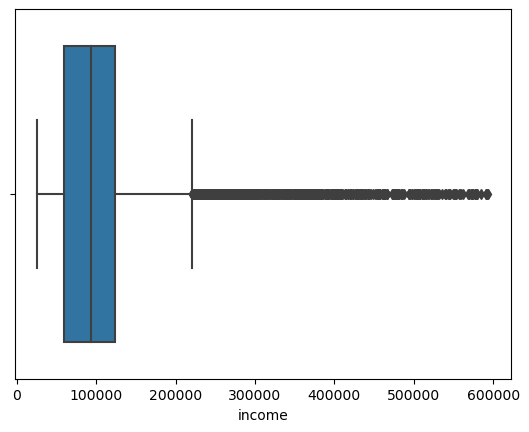

In [21]:
# Visualise the column 
sb.boxplot (x= df['income'])

## 04 Duplicates

In [22]:
# Search for duplicates
duplicated_rows = df[df.duplicated()]

In [23]:
duplicated_rows

,user_id,first_name,last_name,gender,state,age,signup_date,n_dependants,family_status,income


## 05 Missing values

In [24]:
# Missing values
df.isna().sum()

user_id              0
first_name       11259
last_name            0
gender               0
state                0
age                  0
signup_date          0
n_dependants         0
family_status        0
income               0
dtype: int64

## 06 Drop columns

In [25]:
df.drop(['first_name', 'last_name','family_status', 'n_dependants'], axis=1, inplace=True)

In [26]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'signup_date', 'income'], dtype='object')

## 07 Check for export 

In [31]:
df.shape

(206209, 6)

In [33]:
df.dtypes

user_id        object
gender         object
state          object
age             int64
signup_date    object
income          int64
dtype: object

## 08 Export

In [27]:
df.to_pickle(os.path.join(path,'_database', 'customers.pkl'))